In [1]:
import dill
dill.load_session('notebook_env.db')

In [2]:
from sklearn.mixture import GaussianMixture as GMM

gmm = GMM(n_components=2)
gmm.fit(data_train[["meanfun","IQR"]])

GaussianMixture(covariance_type='full', init_params='kmeans', max_iter=100,
                means_init=None, n_components=2, n_init=1, precisions_init=None,
                random_state=None, reg_covar=1e-06, tol=0.001, verbose=0,
                verbose_interval=10, warm_start=False, weights_init=None)

In [6]:
clusters = gmm.predict(data_train[["meanfun","IQR"]])

In [7]:
aux= pd.DataFrame()
aux['X'] = data_train['meanfun']
aux['Y'] = data_train['IQR']
aux['C'] = clusters

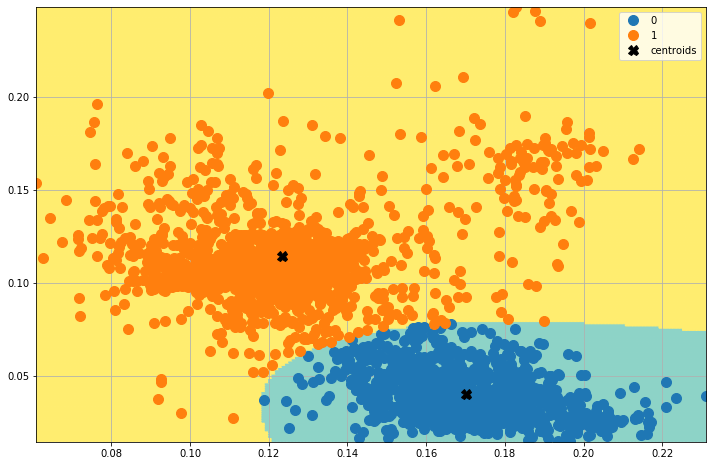

In [11]:
def plot_gmm_decision_boundary(data, gmm):
    plot2d(data)
    X = np.linspace(data.X.min(), data.X.max(),200)
    Y = np.linspace(data.Y.min(), data.Y.max(),200)
    X,Y = np.meshgrid(X,Y)
    
    Z = gmm.predict(np.c_[X.ravel(), Y.ravel()])
    
    Z = np.array(Z).reshape(X.shape)
    
    plt.pcolormesh(X, Y, Z, antialiased=True, cmap='Set3')
    
    centers = gmm.means_
    
    plt.plot(centers[:,0],centers[:,1],'kX',markersize=10,label='centroids')

plt.figure(figsize=(12,8))
plot_gmm_decision_boundary(aux,gmm)
plt.grid()
plt.legend()
plt.show()

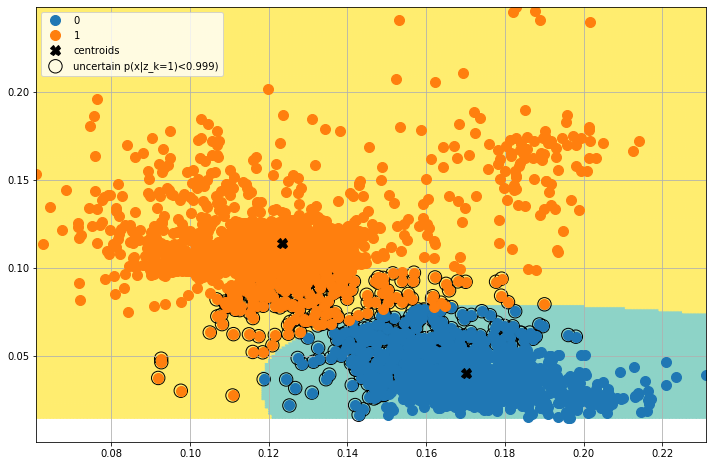

In [19]:
cluster_probabilities = gmm.predict_proba(aux[["X","Y"]])
uncertain = cluster_probabilities.max(1)<0.999 
plt.figure(figsize=(12,8))
plot_gmm_decision_boundary(aux,gmm)
plt.scatter(aux['X'].values[uncertain],aux['Y'].values[uncertain],180,
                facecolors='none',edgecolors='k', label='uncertain p(x|z_k=1)<0.999)')
plt.grid()
plt.legend()
plt.show()

In [32]:
prob=gmm.predict(data_test[["meanfun","IQR"]])
prob=prob==0
test_gt=data_test["label"]
confusion_matrix(test_gt, prob)

array([[385,   6],
       [ 92, 309]], dtype=int64)

In [34]:
print("Clasisfication report \n",classification_report(test_gt,prob))

Clasisfication report 
               precision    recall  f1-score   support

           0       0.81      0.98      0.89       391
           1       0.98      0.77      0.86       401

    accuracy                           0.88       792
   macro avg       0.89      0.88      0.88       792
weighted avg       0.90      0.88      0.87       792



<h1>------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

In [41]:
gmm = GMM(n_components=2)
gmm.fit(data_train.drop(columns="label"))
prob=gmm.predict(data_test.drop(columns="label"))
test_gt=data_test["label"]
confusion_matrix(test_gt, prob)

array([[333,  58],
       [367,  34]], dtype=int64)

In [42]:
print("Clasisfication report \n",classification_report(test_gt,prob))

Clasisfication report 
               precision    recall  f1-score   support

           0       0.48      0.85      0.61       391
           1       0.37      0.08      0.14       401

    accuracy                           0.46       792
   macro avg       0.42      0.47      0.37       792
weighted avg       0.42      0.46      0.37       792



In [43]:
dill.dump_session('notebook_env.db')